# Quandl API - authorized access

Quandl provides a powerful API for economics and finance specilists. It is a one place for all solution for those who are interested both in publiclky available macroeconomic, financial and other data and for those who are ready to pay for Bloomberg-and-Reuters-like company data. The API can be accessed even from Excel. It has libraries for several programming languages including R and Python. The package for Python is called **Quandl** and and can be installed using pip as usuallly:
```
pip install Quandl
```

It is worth mentioning that Quandl also provides unauthorized access to several databases in CSV, JSON and XML formats. As an example, one may consider getting GDP ([Gross Domestic Product](http://www.investopedia.com/ask/answers/199.asp)) data from FRED ([Federal Researve Economic Data](https://fred.stlouisfed.org/)) using the following links:
* JSON file - https://www.quandl.com/api/v3/datasets/FRED/GDP.json
* XML file - https://www.quandl.com/api/v3/datasets/FRED/GDP.xml
* CSV file - https://www.quandl.com/api/v3/datasets/FRED/GDP.csv

*Note: the only difference between this links is the last component: file dimension.

Yet, using authorized access to **Quandl** trough the abovementioned library provides some user-frnedly features, includign the fact that by default most data is received into already well-known Pandas dataframes (thus, we can use the **head()** function, drop or fill missing values, plot etc.).

In [3]:
import quandl

Let's now get the same data trough the library and using our API key for authorized access.

In [8]:
US_GDP_data = quandl.get("FRED/GDP",authtoken = 'somesecrettokenhere')

In [9]:
US_GDP_data.head()

,Value
Date,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


As you can see, the dates were directly saved as an index (row name) which simplifies our life: we can choose whatever period we want by indexing it. Still, the **get()** function can receive more arguments including the **trim_start** and **trim_end** to provide data of specific period.

In [11]:
US_GDP_data_2016 = quandl.get("FRED/GDP",authtoken = 'somesecrettokenhere',
                             trim_start="2016-1-1", trim_end="2016-12-31")
US_GDP_data_2016.head()

,Value
Date,
2016-01-01,18281.6
2016-04-01,18450.1
2016-07-01,18675.3
2016-10-01,18869.4


One may specify even the frequency: e.g. annual, monthly, quarterly (of course, if the data is available at that level).

In [12]:
US_GDP_data_2000s = quandl.get("FRED/GDP",authtoken = 'somesecrettokenhere',
                             trim_start="2000-1-1", collapse='annual')
US_GDP_data_2000s.head()

,Value
Date,
2000-12-31,10472.3
2001-12-31,10701.3
2002-12-31,11103.8
2003-12-31,11816.8
2004-12-31,12562.2


Another advantage of using the authorized access is that one cat get a data for the same period on different indicators into the the same dataframe. Let's get the GDP, [Unemployment rate](http://www.investopedia.com/terms/u/unemploymentrate.asp), [Interest rate](http://www.investopedia.com/terms/i/interestrate.asp) and CPI ([Consumer Price Index](http://www.investopedia.com/terms/c/cpiu.asp)) for Urban customers data from the [FRED database on Quandl](https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data).

In [13]:
data = quandl.get(["FRED/GDP","FRED/UNRATE", "FRED/FEDFUNDS", "FRED/CPIAUCSL"],
                  authtoken = 'somesecrettokenhere',
                  trim_start="2000-1-1", trim_end="2016-12-31", collapse = 'annual')

In [15]:
data.columns = ['GDP','Unemployment', 'Interest_rate', 'CPI_Urban']

In [16]:
data.head()

,GDP,Unemployment,Interest_rate,CPI_Urban
Date,,,,
2000-12-31,10472.3,3.9,6.40,174.6
2001-12-31,10701.3,5.7,1.82,177.4
2002-12-31,11103.8,6.0,1.24,181.8
2003-12-31,11816.8,5.7,0.98,185.5
2004-12-31,12562.2,5.4,2.16,191.7


We can have a bit of statistical analysis here. Let's check the correlation between those 4 variables by generating a correlation matrix. That can again easily be done using a **corr()** function from Pandas that is available for DataFrames.

In [17]:
data.corr()

,GDP,Unemployment,Interest_rate,CPI_Urban
GDP,1.000000,0.184495,-0.533621,0.987589
Unemployment,0.184495,1.000000,-0.655245,0.321762
Interest_rate,-0.533621,-0.655245,1.000000,-0.592876
CPI_Urban,0.987589,0.321762,-0.592876,1.000000


It can be inferred that the increase in Interest rate is accompained by decrease in everything else (negative correlation). The strongest among them is the correlation with Unemployment rate: increase in interest rates is accompained by decrease un unemployment and hence increase in employment rates.

>*Note: take attention to the term **accompained** that was used in the paragraph above. One cannot claim that interest rates drive the increasse or decrease, as the correlation does not imply causation.*

The overall strongest correlation is the one between urban CPI and GDP (a bit less than full 100% correlation). Conclusions are left upon the reader.

We can use **matplotlib.pyplot** to plot the GDP trend line.

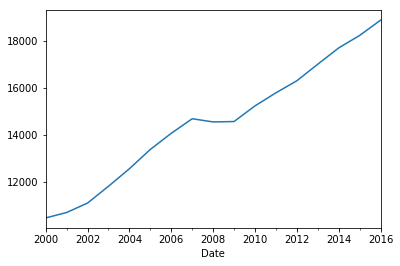

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

data["GDP"].plot()
plt.show()